# **Support Vector Machine**

*   A Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression usecases.
*   SVM is best suited for classification problems than regression problems.
*   In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.
*   Henceforth we perform classification by finding the hyperplane that differentiate the two classes very well.
---

# **Support Vector Machine Terminology**

*   **Hyperplane:** The hyperplane is the decision boundary used to separate data points of different classes in a feature space. For linear classification, this is a linear equation represented as wx+b=0.

*   **Support Vectors:** Support vectors are the closest data points to the hyperplane. These points are critical in determining the hyperplane and the margin in Support Vector Machine (SVM).

*   **Margin:** The margin refers to the distance between the support vector and the hyperplane. The primary goal of the SVM algorithm is to maximize this margin, as a wider margin typically results in better classification performance.

*   **Kernel:** The kernel is a mathematical function used in SVM to map input data into a higher-dimensional feature space. This allows the SVM to find a hyperplane in cases where data points are not linearly separable in the original space. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

*   **Hard Margin:** A hard margin refers to the maximum-margin hyperplane that perfectly separates the data points of different classes without any misclassifications.

*   **Soft Margin:** When data contains outliers or is not perfectly separable, SVM uses the soft margin technique. This method introduces a slack variable for each data point to allow some misclassifications while balancing between maximizing the margin and minimizing violations.

*   **C:** The C parameter in SVM is a regularization term that balances margin maximization and the penalty for misclassifications. A higher C value imposes a stricter penalty for margin violations, leading to a smaller margin but fewer misclassifications.

*   **Hinge Loss:** The hinge loss is a common loss function in SVMs. It penalizes misclassified points or margin violations and is often combined with a regularization term in the objective function.

* **Slack Variable:** The slack variable is an important concept in Soft Margin SVM, which allows the SVM to handle non-linearly separable data or data with noise. It introduces flexibility by permitting some misclassifications while still striving to maximize the margin.

*   **Dual Problem:** The dual problem in SVM involves solving for the Lagrange multipliers associated with the support vectors. This formulation allows for the use of the kernel trick and facilitates more efficient computation.
---

# **How Does it Work**

* Thumb rule to identify the right hyperplane in an N-dimensional space.
* Select the hyperplane which effectively separate data points into different classes in the feature space.
* Maximizing the distances between nearest data point (either class) and hyperplane. This distance is called as Margin.
* The algorithm ensures that the margin between the closest points of different classes, known as support vectors, is maximized.

<img src="https://drive.google.com/uc?id=1KeUk6-NfKo0Fayu736MyqyET8OffFasT" alt="Sample Image" width="500">

* Consider two independent variables, x and y, and one dependent variable represented as either a blue star or a red circle.
* In this scenario, the hyperplane is a line because we are working with two features (x and y).
* There are multiple lines (or hyperplanes) that can separate the data points.
* The challenge is to determine the best hyperplane that maximizes the separation margin between the red circles and blue stars.

---

<img src="https://drive.google.com/uc?id=1wSLGDyTzPtRn8uYQkBgkKG-N9ZiWtCNb" alt="Sample Image" width="500">

* One reasonable choice for the best hyperplane in a Support Vector Machine (SVM) is the one that maximizes the separation margin between the two classes.
* The maximum-margin hyperplane, also referred to as the **hard margin**, is selected based on maximizing the distance between the hyperplane and the nearest data point on each side.

---

<img src="https://drive.google.com/uc?id=1oMPFSoJg0UCWJ0d7Ft7STlTBBn6mkS_R" alt="Sample Image" width="500">

* we choose the hyperplane whose distance from it to the nearest data point on each side is maximized.
* If such a hyperplane exists it is known as the maximum-margin hyperplane/hard margin. So from the above figure, we choose B.




# **RBF or Gaussian Kernal**

# **RBF Kernel Equation**

* The Radial Basis Function (RBF) kernel, also known as the Gaussian kernel, is a common kernel used in Support Vector Machines (SVM).
* The RBF kernel computes the similarity between two points in the feature space using the following equation:

$$K(x, y) = e^{\frac{-\|x - y\|^2}{2\sigma^2}}$$


Where:

* x and x′ are two data points in the feature space.
* $$∥x−y∥^2$$ is the squared Euclidean distance between the two points.
* σ (sigmoid) is the only parameter of this function and it corresponds to the standard deviation.

$$K(x, y) = e^{{-\gamma.||x - y\|^2}}$$

Where:
* where (Gamma), corresponds to the inverse of the standard deviation in the RBF kernel.
---

**Parameters for RBF Kernel in SVC() Function Call**

* When using the RBF kernel in the SVC() function from the scikit-learn library, you need to set the following parameters:
  * kernel='rbf': Specifies that the RBF kernel should be used.
  * gamma: The kernel coefficient, controlling the influence of each training sample.
  * C: The regularization parameter, controlling the trade-off between achieving a low training error and minimizing model complexity.

---



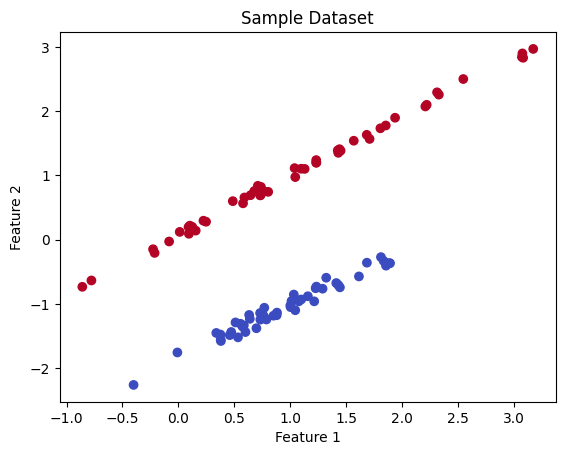

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Scatter plot of the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title("Sample Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


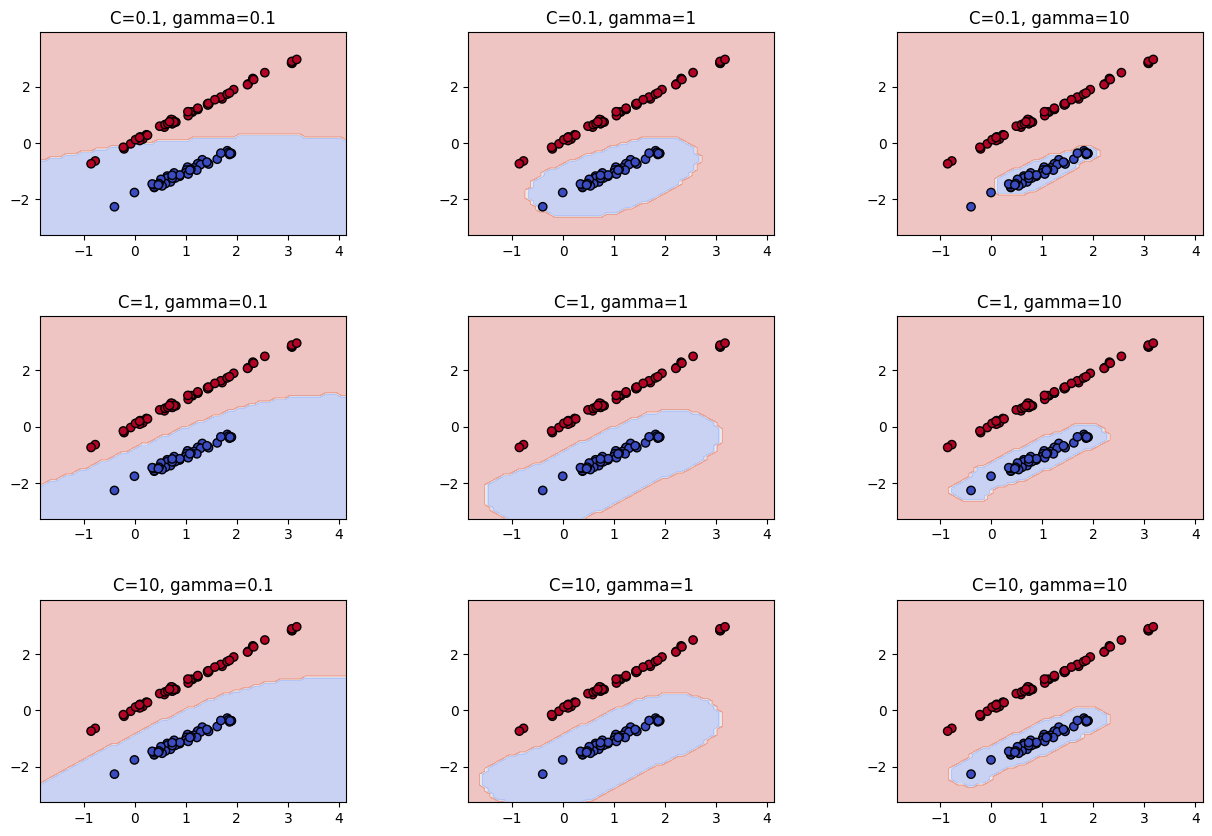

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different combinations of C and gamma
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        plot_decision_boundaries(X, y, model, axes[i, j])
        axes[i, j].set_title(f"C={C}, gamma={gamma}")

plt.show()


**Interpretation of Plots:**

* Low C and Low gamma:
  * The decision boundary is simple and smooth.
  * The model likely underfits the data.

* Low C and High gamma:
  * The decision boundary starts to overfit by focusing on more intricate patterns.

* High C and Low gamma:
  * The decision boundary attempts to classify all points correctly, leading to a more complex boundary but still with some generalization.

* High C and High gamma:
  * The decision boundary is highly complex and adapts to the noise in the dataset.
  * This configuration is prone to overfitting.

* Key Takeaways:

  * **C** controls the complexity of the model by balancing the margin width and training accuracy.
  * **gamma** controls the reach of influence of individual training examples.
  * **Tuning C and gamma is crucial to find a good balance between underfitting and overfitting**.
  * It’s common to use techniques like Grid Search with Cross-Validation to find the optimal values of C and gamma.

---

* When using the RBF kernel in SVM, tuning the C and gamma parameters is crucial for achieving optimal performance.
* Now we shall look into these parameters and how to tune them effectively.
1. **Regularization Parameter (C):**

Role:
  * Controls the trade-off between achieving a low training error and a low testing error by adjusting the margin size.
  * A small C value allows for a wider margin, potentially increasing the number of misclassifications but promoting generalization.
  * A large C value aims to classify all training points correctly, which can lead to overfitting.

Effect:
  * High C: Tight decision boundary; overfits to training data.
  * Low C: Loose decision boundary; generalizes better but may misclassify some training points.

2. **Kernel Coefficient (gamma):**

Role:
  * Determines the influence of a single training example on the decision boundary.
  * A small gamma means the influence of a single example is far-reaching, resulting in smoother decision boundaries.
  * A large gamma leads to decision boundaries that follow the data closely, which can result in overfitting.

Effect:
  * High gamma: Complex, wiggly decision boundary; can overfit.
  * Low gamma: Smooth decision boundary; can underfit.


# **Role of Gamma in SVM:**

* **Gamma Determines Influence:**
  * gamma controls how much influence a single training example (data point) has on the decision boundary.
  * Think of each data point as casting an "influence" around it. The gamma parameter decides how wide or narrow that influence is.

    * **Small Gamma (e.g., gamma=0.1):**
      * A small gamma means that each data point has a wide influence. This results in smoother and more generalized decision boundaries.
      * **Effect:** The SVM tries to draw a decision boundary that is less sensitive to individual points, which is helpful for avoiding overfitting. The model will generalize better to unseen data.
      * **Analogy:** Imagine dropping a pebble into water and watching the ripples spread far out. Similarly, with a small gamma, the "ripples" of influence from each data point are broad.

    * **Large Gamma (e.g., gamma=10):**
      * A large gamma means that each data point has a narrow influence. This causes the decision boundary to fit closely around the training data points.
      * **Effect:** The decision boundary will closely follow the data, which might capture noise as well, leading to overfitting. The model will be highly tuned to the training data but may perform poorly on unseen data.
      * **Analogy:** Now imagine dropping a heavy object into water, creating a small splash with sharp, localized ripples. Similarly, with a large gamma, the influence from each data point is tight and concentrated.

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Generate a synthesized dataset with 1000 points
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for 'C' and 'gamma'
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the GridSearchCV with SVM and parameter grid
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-validation Score: {grid.best_score_}")

# Test the best model on the test set
y_pred = grid.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

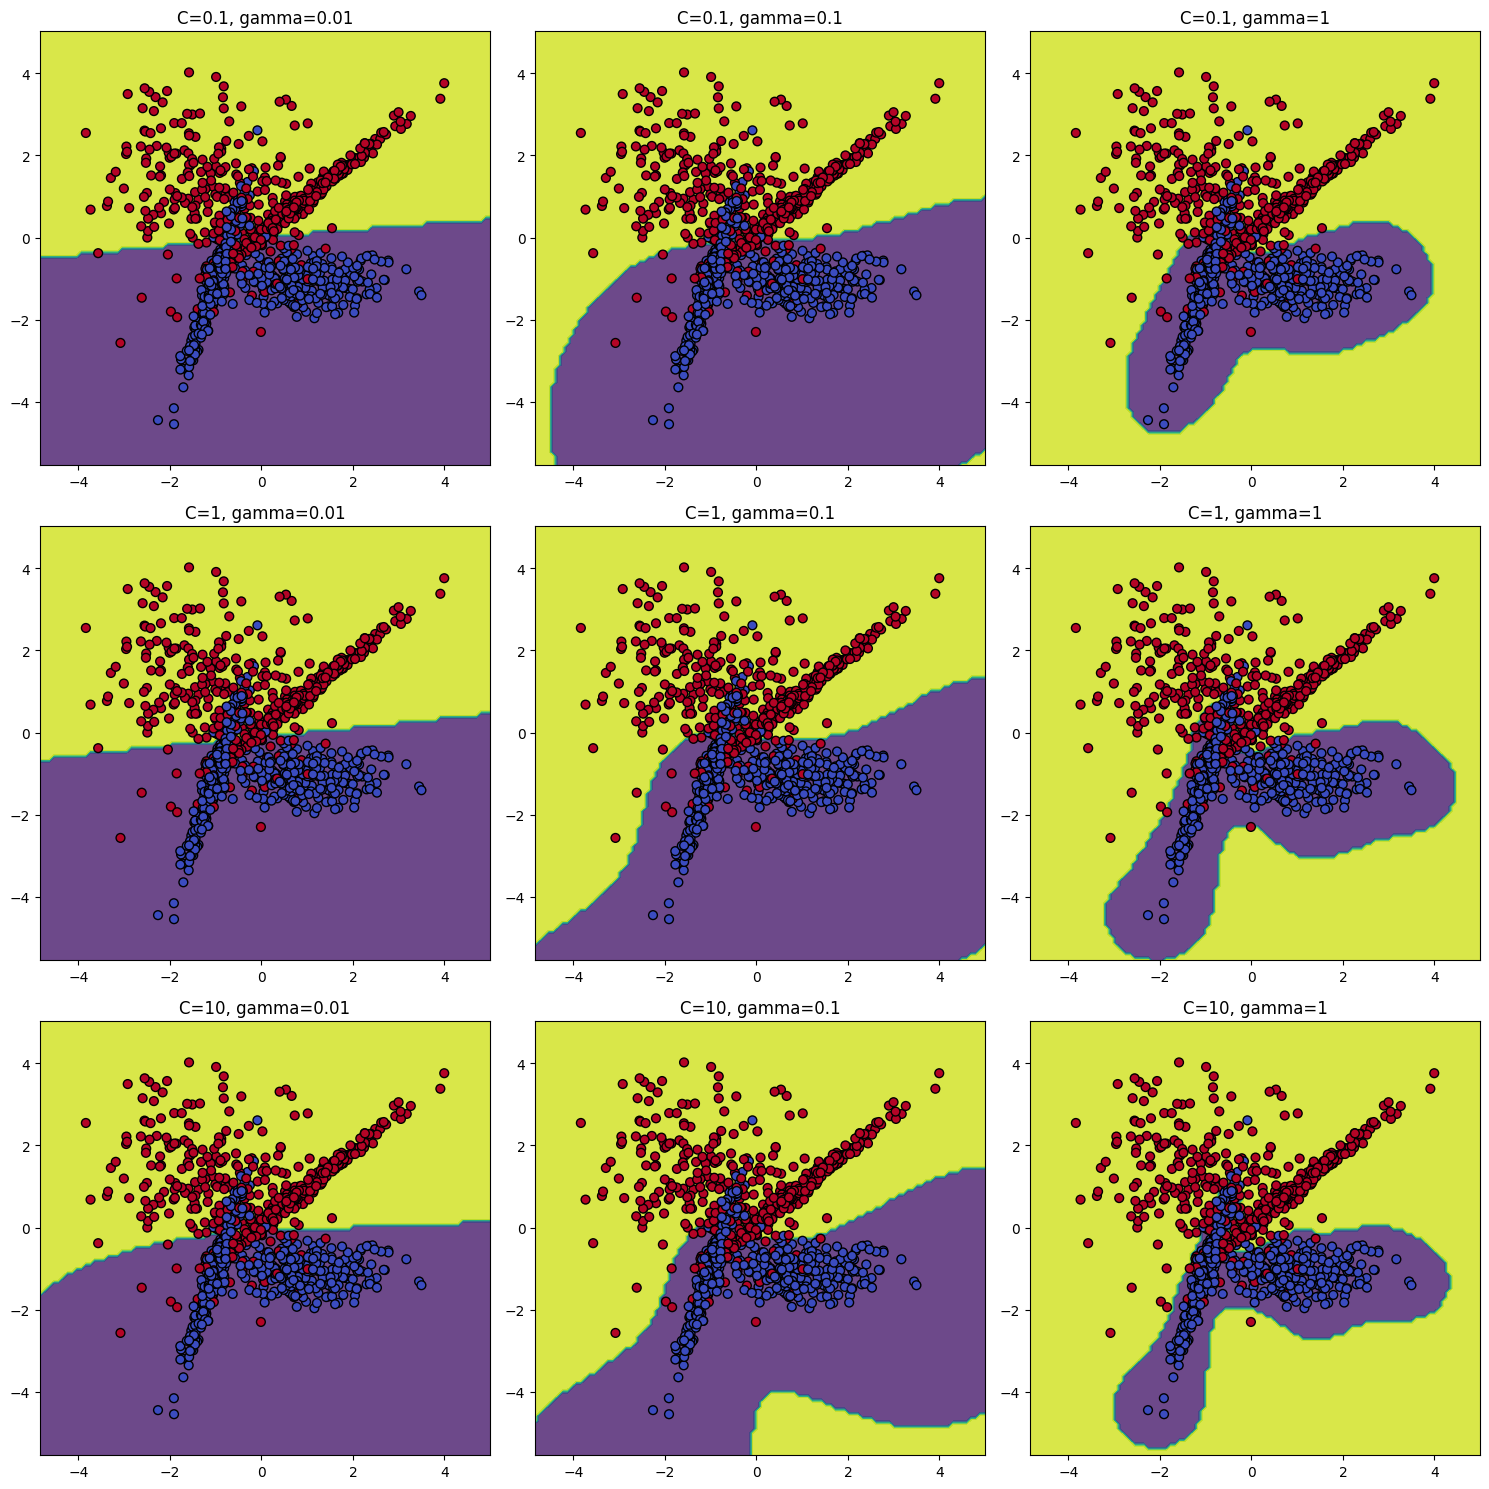

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a 2D synthetic dataset for visualization
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Define different values for C and gamma (high, middle, low)
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Plotting the decision boundaries for different combinations of C and gamma
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        # Train an SVM with RBF kernel for each combination of C and gamma
        clf = SVC(C=C, gamma=gamma, kernel='rbf')
        clf.fit(X, y)

        # Predict the decision boundary
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        ax = axes[i, j]
        ax.contourf(xx, yy, Z, alpha=0.8)
        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=40, cmap=plt.cm.coolwarm)
        ax.set_title(f'C={C}, gamma={gamma}')
        ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
        ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.tight_layout()
plt.show()


* **Interpretation of the Graphs**

  * **Low C and Low gamma:**
    * When C is low, the model is more tolerant of misclassifications, leading to a simpler decision boundary.
    * Low gamma means that each data point has less influence on the decision boundary, leading to a smoother and broader decision region.
    * In this case, the decision boundary is likely to be more linear and might not capture complex patterns in the data.

  * **High C and Low gamma:**
    * A high C means the model is more sensitive to misclassifications and will try to perfectly fit the training data.
    * Low gamma results in a smoother decision boundary with fewer variations.
    * The decision boundary may be more complex, but still unable to capture very intricate details of the data.

  * **Low C and High gamma:**
    * With a low C, the model allows for misclassifications, and a high gamma gives each point more influence, leading to a more flexible decision boundary.
    * The decision boundary may appear highly complex, potentially overfitting to noise in the data.

  * **High C and High gamma:**
    * A high C forces the model to fit the training data closely, and a high gamma causes the model to fit the data in a more complex manner with many small changes in the decision boundary.
    * The decision boundary can become very jagged, and this setup has a higher likelihood of overfitting, especially in noisy data.

---

# **Polynomial Kernel**

---

* The Polynomial kernel is a popular kernel function used in SVM that represents the similarity of vectors in a feature space over polynomials of the original variables.
* The polynomial kernel equation is given by:

$$K(x, x') = (\gamma \cdot x^\top x' + r)^d$$

Where,
* x and x′ are two data points in the input space.
* γ a coefficient (scale factor), which is a tuning parameter.
* r is a constant term (often referred to as the coefficient).
* d is the degree of the polynomial, another tuning parameter.

## **Parameters for Polynomial Kernel in SVC() Function Call**

* kernel='poly': Specifies that the polynomial kernel should be used.
* degree: The degree of the polynomial kernel (default is 3).
* gamma: The kernel coefficient for the polynomial kernel.
  * 'scale': (default).
  * 'auto': __________.(Expiriment)
  * A positive float value can be specified explicitly.

* coef0: The independent term r in the polynomial kernel function.
---

* Description of Parameters:

  * degree: Determines the complexity of the decision boundary.
      * Higher degree: Leads to more complex decision boundaries, which can better capture the non-linear patterns but might overfit.
      * Lower degree: Simpler decision boundaries, which might underfit.

  * gamma: Controls the influence of a single training example.
      * High gamma: Each point has a very localized influence, leading to a highly flexible decision boundary. This is useful when data points are very close and overlapping but might overfit.
      * Low gamma: Points have a wider influence, resulting in smoother decision boundaries that generalizes better but might underfit overlapping data points.
      * 'auto': Uses $$\frac{1}{n_{\text{features}}}$$ as the gamma value.

  * coef0: The independent term added to the polynomial kernel.
      * Higher coef0: Adds a constant term to the polynomial kernel, which can shift the decision boundary. can adjust the influence of higher-degree polynomials, potentially providing a better fit for overlapping data.
      * Lower coef0: Results in a decision boundary more centered on the original data points without the shift.
      ---

* We'll use a synthetic dataset for this demonstration and tune the degree, gamma, and coef0 parameters to observe their effects when using  using the Polynomial kernel in an SVM.

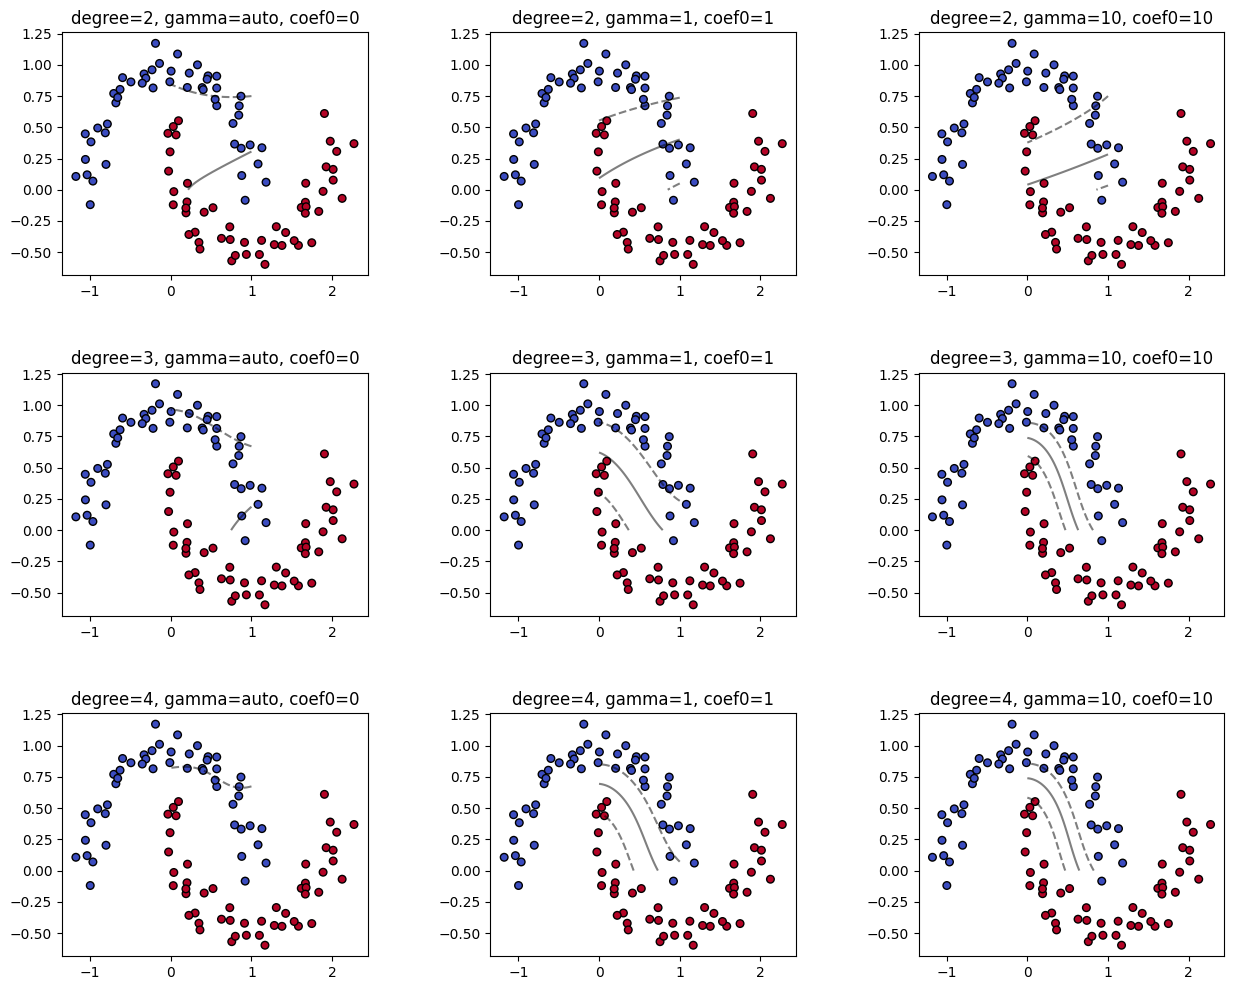

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Generate synthetic dataset (non-linear)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot the dataset points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Set different values of degree, gamma, and coef0
degrees = [2, 3, 4]
gamma_values = ['auto', 1, 10]
coef0_values = [0, 1, 10]

fig, axes = plt.subplots(len(degrees), len(gamma_values), figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterate over different parameter combinations
for i, degree in enumerate(degrees):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='poly', degree=degree, gamma=gamma, coef0=coef0_values[j])
        model.fit(X, y)
        plot_decision_boundary(model, X, y, ax=axes[i, j])
        axes[i, j].set_title(f"degree={degree}, gamma={gamma}, coef0={coef0_values[j]}")

plt.show()


* Visual Interpretation:

  * Top-left (degree=2, gamma=auto, coef0=0): A simple quadratic decision boundary.
  * Middle (degree=3, gamma=1, coef0=1): A cubic decision boundary with a moderate complexity.
  * Bottom-right (degree=4, gamma=10, coef0=10): A very complex decision boundary with higher degree, gamma, and coef0.

**Example 2: Overlapping data Points**
Explanation with Overlapping Data:

* Overlapping data points introduce more noise and complexity to the dataset, making it harder for the SVM to find a clean decision boundary.

  * Effect of Parameters:
    * degree:
      * Low degree (e.g., 2): Simpler decision boundaries may not capture the complex patterns in overlapping data.
      * Higher degree (e.g., 4): More complex boundaries that might fit the noise.
    * gamma:
      * Low gamma (e.g., 'auto'): Smoother boundaries that generalize better.
      * High gamma (e.g., 10): Highly flexible boundaries that might overfit, especially with noise.
    * coef0:
      * Low coef0 (e.g., 0): The polynomial's baseline effect is minimal.
      * High coef0 (e.g., 10): Adds a significant baseline shift, affecting the decision boundary's shape.

---

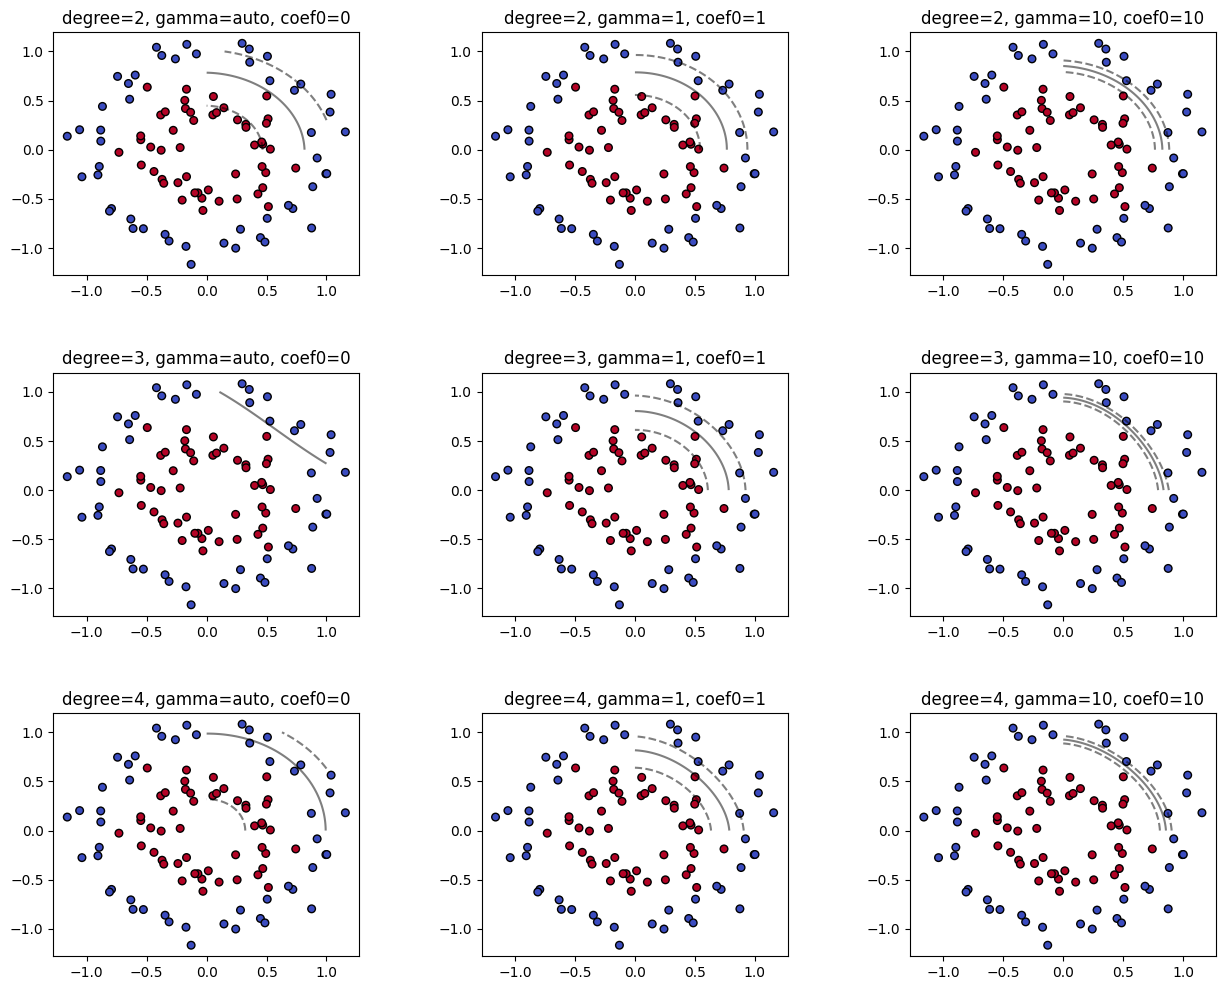

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Generate synthetic dataset with overlapping data points
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot the dataset points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Set different values of degree, gamma, and coef0
degrees = [2, 3, 4]
gamma_values = ['auto', 1, 10]
coef0_values = [0, 1, 10]

fig, axes = plt.subplots(len(degrees), len(gamma_values), figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterate over different parameter combinations
for i, degree in enumerate(degrees):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='poly', degree=degree, gamma=gamma, coef0=coef0_values[j])
        model.fit(X, y)
        plot_decision_boundary(model, X, y, ax=axes[i, j])
        axes[i, j].set_title(f"degree={degree}, gamma={gamma}, coef0={coef0_values[j]}")

plt.show()


* Visual Interpretation:

  * Top-left (degree=2, gamma=auto, coef0=0): A simple quadratic decision boundary struggles to separate the overlapping data.
  * Middle (degree=3, gamma=1, coef0=1): A more complex cubic boundary handles some overlap better.
  * Bottom-right (degree=4, gamma=10, coef0=10): Very complex boundaries may overfit the noise, creating intricate decision boundaries.

**Conclusion:**

* Low Degree + Low Gamma: The decision boundary is simple and smooth, underfitting the data.
* High Degree + High Gamma: The boundary becomes complex, overfitting the data and capturing noise.
* High coef0: Shifts the boundary, which might improve fitting in some cases but can also lead to overfitting if too high.

---

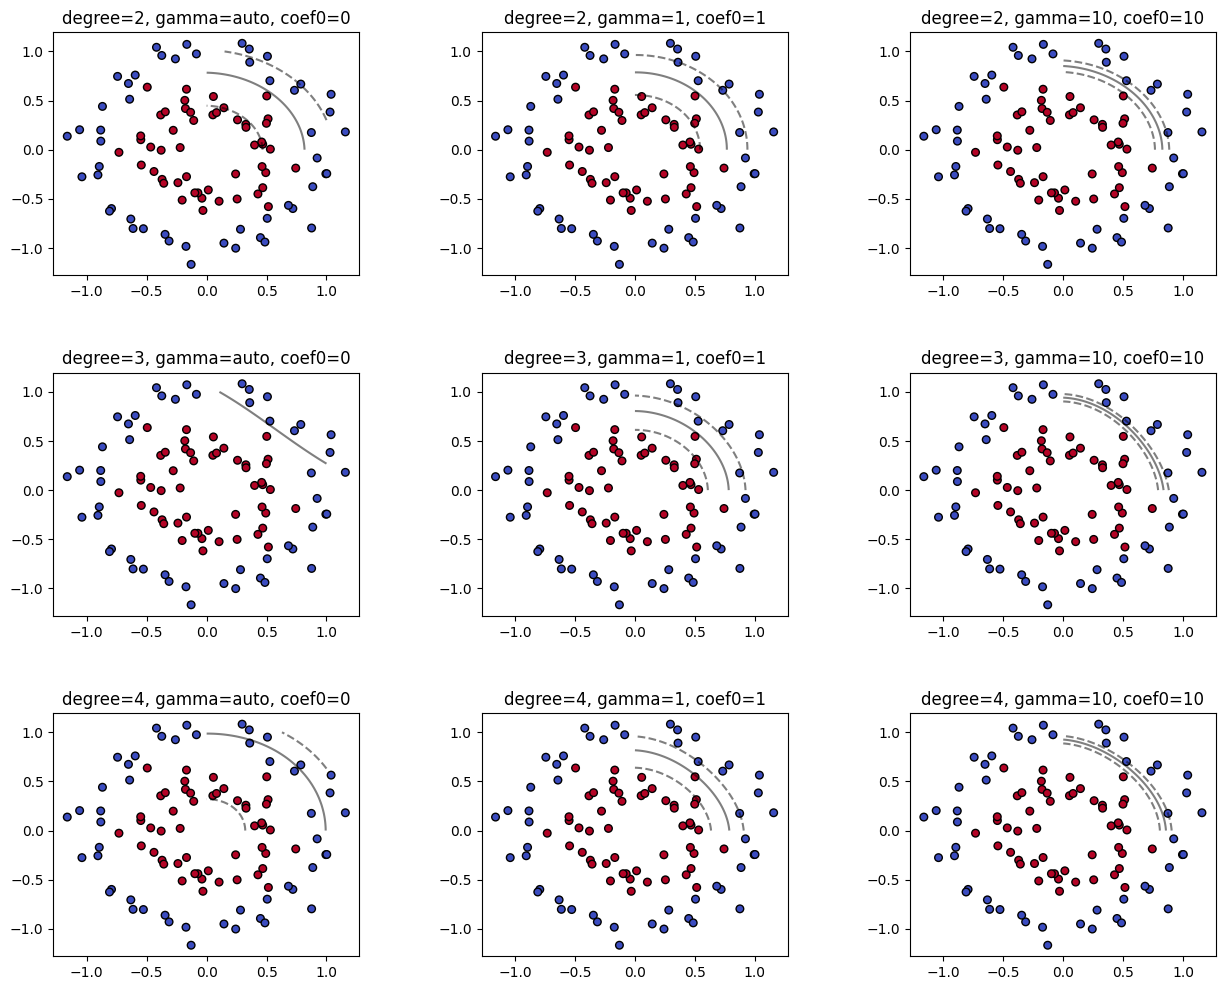

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Generate synthetic dataset with overlapping data points
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot the dataset points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Set different values of degree, gamma, and coef0
degrees = [2, 3, 4]
gamma_values = ['auto', 1, 10]
coef0_values = [0, 1, 10]

fig, axes = plt.subplots(len(degrees), len(gamma_values), figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

C_value = 1  # Keeping C constant to focus on the polynomial kernel's parameters

# Iterate over different parameter combinations
for i, degree in enumerate(degrees):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='poly', degree=degree, gamma=gamma, coef0=coef0_values[j], C=C_value)
        model.fit(X, y)
        plot_decision_boundary(model, X, y, ax=axes[i, j])
        axes[i, j].set_title(f"degree={degree}, gamma={gamma}, coef0={coef0_values[j]}")

plt.show()


# **Hinge Loss**

* Hinge loss is a loss function primarily used in Support Vector Machines (SVMs) for classification tasks.
* It measures how well a model’s predictions match the true labels while enforcing a margin of separation between the classes.
* Hinge loss is particularly useful for binary classification problems:

$$L(y, f(x)) = \max(0, 1 - y \cdot f(x))$$

Where:

  * y is the true label of the instance (either +1 or -1 for binary classification).
  * f(x) is the predicted value, typically the output of a linear classifier
  (i.e, $$f(x) = w^T x + b$$).
  * The margin 1−y⋅f(x) quantifies the distance of the predicted value from the correct classification boundary.
  * The hinge loss is zero if the instance is correctly classified with a margin of at least 1, and increases if the margin is smaller or if the instance is misclassified.

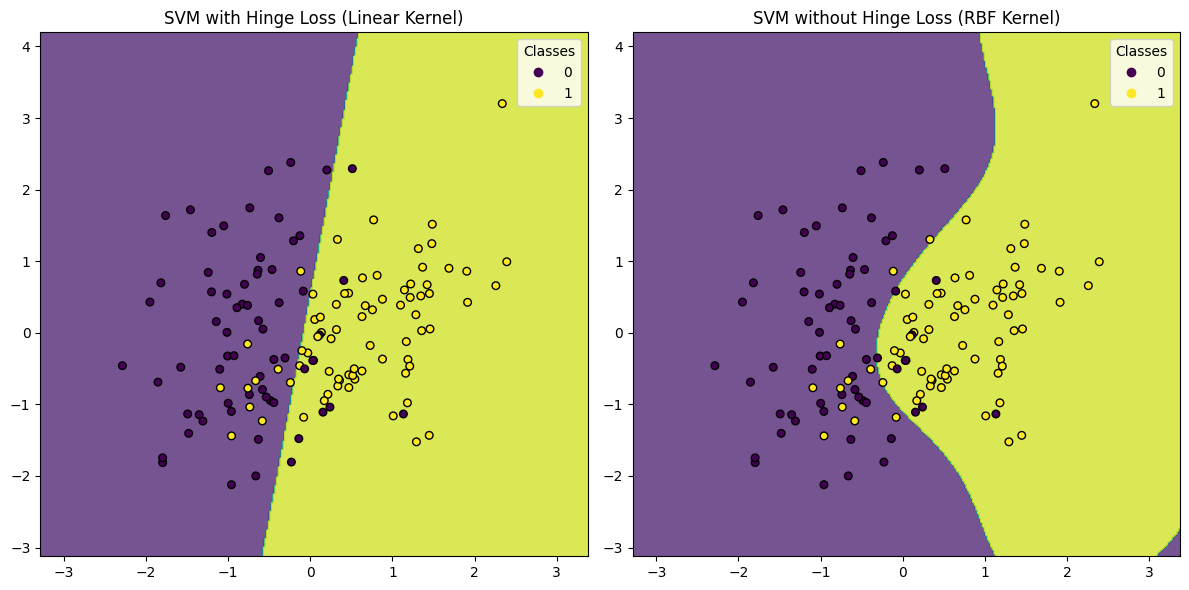

Accuracy of SVM with Hinge Loss (Linear Kernel): 86.67%
Accuracy of SVM without Hinge Loss (RBF Kernel): 85.00%


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Step 1: Generate a synthetic dataset
# Create a simple 2D dataset with two classes
X, y = datasets.make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train the SVM model with a linear kernel (hinge loss)
svm_hinge = SVC(kernel='linear', C=1)
svm_hinge.fit(X_train, y_train)

# Step 5: Train the SVM model with a non-linear kernel (no hinge loss)
svm_non_hinge = SVC(kernel='rbf', C=1)
svm_non_hinge.fit(X_train, y_train)

# Step 6: Visualize the decision boundaries
def plot_decision_boundary(X, y, model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.75)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=30)
    ax.set_title(title)
    return scatter

# Step 7: Plot the decision boundaries for both models
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot decision boundary for SVM with hinge loss (linear kernel)
scatter1 = plot_decision_boundary(X_train, y_train, svm_hinge, axs[0], 'SVM with Hinge Loss (Linear Kernel)')

# Plot decision boundary for SVM without hinge loss (RBF kernel)
scatter2 = plot_decision_boundary(X_train, y_train, svm_non_hinge, axs[1], 'SVM without Hinge Loss (RBF Kernel)')

# Add color legends
for ax, scatter in zip(axs, [scatter1, scatter2]):
    ax.legend(*scatter.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()

# Step 8: Evaluate both models
from sklearn.metrics import accuracy_score

y_pred_hinge = svm_hinge.predict(X_test)
y_pred_non_hinge = svm_non_hinge.predict(X_test)

print(f"Accuracy of SVM with Hinge Loss (Linear Kernel): {accuracy_score(y_test, y_pred_hinge) * 100:.2f}%")
print(f"Accuracy of SVM without Hinge Loss (RBF Kernel): {accuracy_score(y_test, y_pred_non_hinge) * 100:.2f}%")


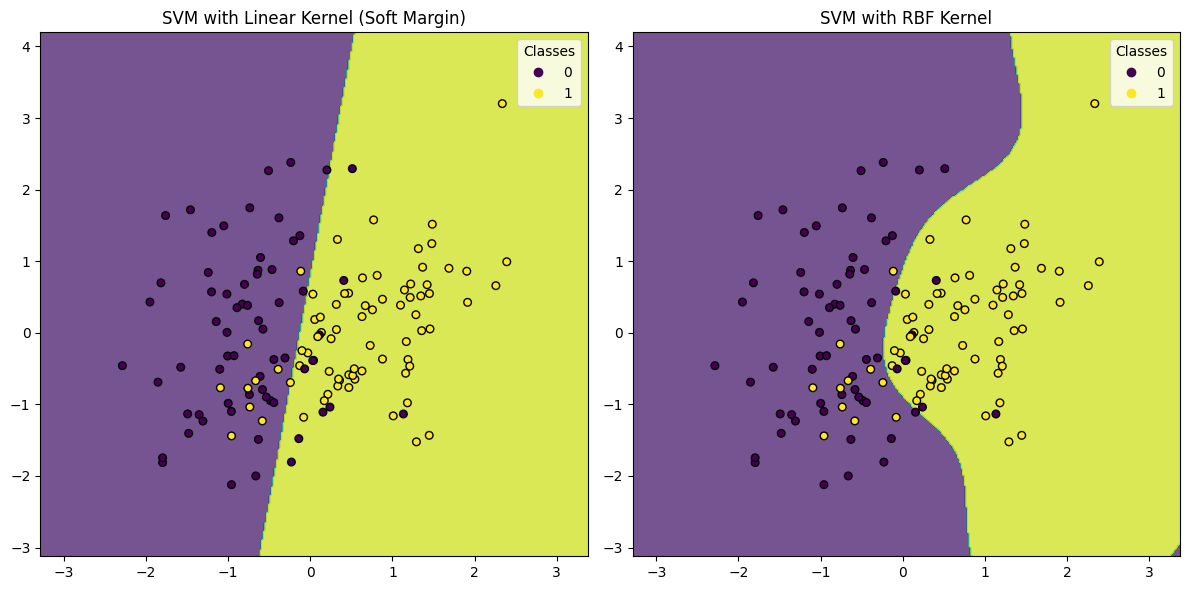

Accuracy of SVM with Linear Kernel (Soft Margin): 86.67%
Accuracy of SVM with RBF Kernel: 86.67%


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Step 1: Generate a synthetic dataset
# Create a simple 2D dataset with two classes
X, y = datasets.make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train the SVM model with a linear kernel (Soft Margin SVM, no hinge loss)
# We use the standard SVM with a linear kernel but adjust the penalty with C
svm_linear_soft = SVC(kernel='linear', C=10)  # C controls the trade-off between margin and misclassification
svm_linear_soft.fit(X_train, y_train)

# Step 5: Train the SVM model with a non-linear kernel (RBF kernel)
svm_rbf = SVC(kernel='rbf', C=10)
svm_rbf.fit(X_train, y_train)

# Step 6: Visualize the decision boundaries
def plot_decision_boundary(X, y, model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.75)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=30)
    ax.set_title(title)
    return scatter

# Step 7: Plot the decision boundaries for both models
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot decision boundary for SVM with linear kernel (soft margin, no hinge loss)
scatter1 = plot_decision_boundary(X_train, y_train, svm_linear_soft, axs[0], 'SVM with Linear Kernel (Soft Margin)')

# Plot decision boundary for SVM with RBF kernel
scatter2 = plot_decision_boundary(X_train, y_train, svm_rbf, axs[1], 'SVM with RBF Kernel')

# Add color legends
for ax, scatter in zip(axs, [scatter1, scatter2]):
    ax.legend(*scatter.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()

# Step 8: Evaluate both models
from sklearn.metrics import accuracy_score

y_pred_linear = svm_linear_soft.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print(f"Accuracy of SVM with Linear Kernel (Soft Margin): {accuracy_score(y_test, y_pred_linear) * 100:.2f}%")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_score(y_test, y_pred_rbf) * 100:.2f}%")


# **Slack Variable**

**Introduction:**
* The slack variable is an important concept in Soft Margin SVM, which allows the SVM to handle non-linearly separable data or data with noise.
* It introduces flexibility by permitting some misclassifications while still striving to maximize the margin.

**Need for Slack Variable:**
* In real-world scenarios, data is often not perfectly linearly separable due to noise, overlapping classes, or outliers.
* In above cases, the strict constraint of Hard Margin SVM (which requires all points to be correctly classified with a margin) is too rigid, leading to poor generalization.
* Soft Margin SVM relaxes these constraints by allowing some data points to be within the margin or on the wrong side of the decision boundary.
* This relaxation is achieved through the introduction of slack variables.

**Definition of Slack Variables:**
* For each data point i, a slack variable ξi​ (xi) is introduced. It measures the extent to which the point xi violates the margin requirements.
  * If ξi​=0, the point is either correctly classified and lies outside the margin, or it is exactly on the margin.
  * If 0<ξi≤1, the point lies within the margin but is still correctly classified.
  * If ξi>1, the point is misclassified (on the wrong side of the decision boundary).

**Mathematical Formulation:**

* The optimization problem for Soft Margin SVM with slack variables is defined as:

$$
\begin{aligned}
& \min_{w, b, \xi} \quad \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i \\
Subjected to: \\
& y_i (w \cdot x_i + b) \geq 1 - \xi_i \quad \text{for all } i \\
& \xi_i \geq 0 \quad \text{for all } i
\end{aligned}
$$

Where:
  * w is the weight vector.
  * b is the bias term.
  * ξi​ are the slack variables.
  * C is the regularization parameter (a hyperparameter that controls the trade-off between maximizing the margin and minimizing the slack variable penalty).
  * n is the number of data points.
  * yi is the true label of xi​ (with values ±1).

**Role of the Regularization Parameter C:**

* **High C:** The model focuses more on minimizing the slack variables, meaning fewer misclassifications are allowed, leading to a smaller margin (closer to hard margin SVM). This might cause overfitting.
* **Low C:** The model allows more misclassifications (higher slack), leading to a larger margin and potentially better generalization. This might cause underfitting.

**Interpretation:**
* The slack variable ξi​ allows SVM to accommodate data points that do not satisfy the margin condition, making SVM applicable to noisy data or data that is not linearly separable.
* By penalizing the total slack ∑ξi​, SVM balances between maximizing the margin and minimizing the classification error.

<img src="https://drive.google.com/uc?id=1ESdwdR2BpLDmzSVFsXa6KDz91LGuFJhI" alt="Sample Image" width="500">
